## Data from YouTube's Videos

### Part I: Doing on Japan dataset

#### 1. Preparing your data

In [1]:
# !pip install --upgrade pip
# !pip install --upgrade pandas

In [2]:
#!pip install pandas
#!pip install numpy
#!pip install matplotlib
#!pip install seaborn
#!pip install datetime

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from scipy import stats
import datetime as dt

In [4]:
# japan_df = pd.read_csv('JP_videos.csv', encoding = "iso-8859-1")
df = pd.read_csv('JP_videos.csv', encoding_errors='ignore')

In [5]:
df.shape

(20523, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20523 entries, 0 to 20522
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                20523 non-null  object
 1   trending_date           20523 non-null  object
 2   title                   20523 non-null  object
 3   channel_title           20523 non-null  object
 4   category_id             20523 non-null  int64 
 5   publish_time            20523 non-null  object
 6   tags                    20523 non-null  object
 7   views                   20523 non-null  int64 
 8   likes                   20523 non-null  int64 
 9   dislikes                20523 non-null  int64 
 10  comment_count           20523 non-null  int64 
 11  thumbnail_link          20523 non-null  object
 12  comments_disabled       20523 non-null  bool  
 13  ratings_disabled        20523 non-null  bool  
 14  video_error_or_removed  20523 non-null  bool  
 15  de

In [7]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,5ugKfHgsmYw,18.07.02,陸自ヘリ、垂直に落下＝路上の車が撮影,時事通信映像センター,25,2018-02-06T03:04:37.000Z,"事故|""佐賀""|""佐賀県""|""ヘリコプター""|""ヘリ""|""自衛隊""|""墜落""|""落下""|""現...",188085,591,189,0,https://i.ytimg.com/vi/5ugKfHgsmYw/default.jpg,True,False,False,佐賀県神埼市の民家に墜落した陸上自衛隊のＡＨ６４Ｄ戦闘ヘリコプターが垂直に落下する様子を、近...
1,ohObafdd34Y,18.07.02,イッテQ お祭り男宮川×手越 巨大ブランコ②,神谷えりな Kamiya Erina 2,1,2018-02-06T04:01:56.000Z,[none],90929,442,88,174,https://i.ytimg.com/vi/ohObafdd34Y/default.jpg,False,False,False,NaN
2,aBr2kKAHN6M,18.07.02,Live Views of Starman,SpaceX,28,2018-02-06T21:38:22.000Z,[none],6408303,165892,2331,3006,https://i.ytimg.com/vi/aBr2kKAHN6M/default.jpg,False,False,False,NaN
3,5wNnwChvmsQ,18.07.02,東京ディズニーリゾートの元キャストが暴露した秘密5選,アシタノワダイ,25,2018-02-06T06:08:49.000Z,アシタノワダイ,96255,1165,277,545,https://i.ytimg.com/vi/5wNnwChvmsQ/default.jpg,False,False,False,東京ディズニーリゾートの元キャストが暴露した秘密5選\n\nかたまりクリエイトさま\n【検証...
4,B7J47qFvdsk,18.07.02,榮倉奈々、衝撃の死んだふり！映画『家に帰ると妻が必ず死んだふりをしています。』特報,シネマトゥデイ,1,2018-02-06T02:30:00.000Z,[none],108408,1336,74,201,https://i.ytimg.com/vi/B7J47qFvdsk/default.jpg,False,False,False,家に帰ってきたサラリーマンのじゅん（安田顕）は、玄関で血を出して倒れている妻ちえ（榮倉奈々）...


In [8]:
df.tail()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
20518,GuWCkLnCMOo,18.14.06,หนึ่งด้าวฟ้าเดียว NeungDaoFahDeaw EP.15 ตอนที่...,Ch3Thailand,24,2018-06-13T17:00:01.000Z,"หนึ่งด้าวฟ้าเดียว|""NeungDaoFahDeaw""|""เจมส์ จิร...",81321,321,17,61,https://i.ytimg.com/vi/GuWCkLnCMOo/default.jpg,False,False,False,หลังจบละครทางหน้าจอทีวี สามารถรับชมได้อีกครั้ง...
20519,nOUlB0i2MaA,18.14.06,2018 국민의 선택 - 선거방송 '왕의 귀환' 12시간 연속 생중계! (풀영상) ...,SBS 뉴스,25,2018-06-13T19:10:31.000Z,"뉴스|""NEWS""|""news""|""SBS""|""sbs""|""SBS NEWS""|""SBS8N...",433188,0,0,175,https://i.ytimg.com/vi/nOUlB0i2MaA/default.jpg,False,True,False,'선거방송의 명가' SBS가 온다! SBS가 제 7회 전국동시지방선거(6·13 지방...
20520,4cRanIowkTE,18.14.06,元FBIエージェントが教える、200％人を引き付けるようになるコツ、トップ10,ブライトサイド | Bright Side Japan,26,2018-06-13T14:00:02.000Z,"人々を魅了する方法|""魅力的になるには""|""成功の秘訣""|""簡単なトリック""|""人から好かれ...",39235,1194,27,46,https://i.ytimg.com/vi/4cRanIowkTE/default.jpg,False,False,False,元FBIエージェント、ジャック･シェーファー医師が明かす、人に200％魅力的に見せるトリック...
20521,oLtWIVBVoS8,18.14.06,日本×パラグアイ徹底分析&スペイン代表監督解任事件を解説【トークtheフットボール】#683,Leo the football TV,17,2018-06-13T13:56:47.000Z,"W杯|""ワールドカップ""|""蹴球""|""思想家""|""ラジオ""|""ナポリ""|""ライプツィヒ""|""...",49900,431,66,336,https://i.ytimg.com/vi/oLtWIVBVoS8/default.jpg,False,False,False,「２０１８Ｗ杯ロシア大会日本代表戦ライヴイベント」日本代表のグループリーグ３試合をLeo t...
20522,2IEWv23oa9E,18.14.06,エサのコオロギに夢中で二本足で立つカメレオン,釣りよかHOUSE,24,2018-06-13T09:00:00.000Z,"よーらい|""佐賀よかでしょう""|""釣りよかでしょう""|""釣り""",46265,816,40,59,https://i.ytimg.com/vi/2IEWv23oa9E/default.jpg,False,False,False,使用した物https://amzn.to/2JwOEPGメインチャンネル 釣りよかでしょうh...


In [9]:
df.sample()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
2024,biKRtgcUyvY,18.19.02,欅って、書けない？2018年2月18日【ひらがな禁制！漢字だらけの大新年会！後半戦】,TBS うらら迷路帖,22,2018-02-18T16:20:36.000Z,"欅って、書けない？|""乃木坂工事中""|""欅って、書けない？180218""",73999,169,275,79,https://i.ytimg.com/vi/biKRtgcUyvY/default.jpg,False,False,False,乃木坂工事中 2018年2月18日 180218\n欅って、書けない？180218


#### 2. Cleaning your dataset

In [10]:
df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')

##### Columns' name: OK

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20523 entries, 0 to 20522
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                20523 non-null  object
 1   trending_date           20523 non-null  object
 2   title                   20523 non-null  object
 3   channel_title           20523 non-null  object
 4   category_id             20523 non-null  int64 
 5   publish_time            20523 non-null  object
 6   tags                    20523 non-null  object
 7   views                   20523 non-null  int64 
 8   likes                   20523 non-null  int64 
 9   dislikes                20523 non-null  int64 
 10  comment_count           20523 non-null  int64 
 11  thumbnail_link          20523 non-null  object
 12  comments_disabled       20523 non-null  bool  
 13  ratings_disabled        20523 non-null  bool  
 14  video_error_or_removed  20523 non-null  bool  
 15  de

In [12]:
def get_memory(df):
  print(f"{round(df.memory_usage().sum() / 1000000, 2)} MB")

In [13]:
get_memory(df)

2.2 MB


##### Change trending_date and publish_time to datetime type

In [14]:
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m')
df['trending_date'].dtype

dtype('<M8[ns]')

In [15]:
df['publish_time'] = pd.to_datetime(df['publish_time'])
df['publish_time'].dtype

datetime64[ns, UTC]

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20523 entries, 0 to 20522
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   video_id                20523 non-null  object             
 1   trending_date           20523 non-null  datetime64[ns]     
 2   title                   20523 non-null  object             
 3   channel_title           20523 non-null  object             
 4   category_id             20523 non-null  int64              
 5   publish_time            20523 non-null  datetime64[ns, UTC]
 6   tags                    20523 non-null  object             
 7   views                   20523 non-null  int64              
 8   likes                   20523 non-null  int64              
 9   dislikes                20523 non-null  int64              
 10  comment_count           20523 non-null  int64              
 11  thumbnail_link          20523 non-null  o

##### Check potential category-type columns

In [17]:
print(len(df['category_id'].unique()), '\n', df['category_id'].unique())
print(len(df['tags'].unique()), '\n', df['tags'].unique())

15 
 [25  1 28 22 23 19 15 24 26  2 17 29 10 20 27]
8761 
 ['事故|"佐賀"|"佐賀県"|"ヘリコプター"|"ヘリ"|"自衛隊"|"墜落"|"落下"|"現場"|"神埼市"|"ドライブレコーダー"'
 '[none]' 'アシタノワダイ' ...
 'ポケモンgo|"ポケモン"|"GO"|"はつだ"|"はっちゃんねる"|"実況"|"攻略"|"最新"|"情報"|"ガチャ"|"はじめ"|"しゃちょー"|"カイオーガ"|"色違い"|"紫"|"確率"|"コイキング"|"金"|"対策"|"個体値"|"cp"|"max"|"マックス"|"連"'
 'nepali comedy video|"nepali comedy serial"|"nepali funny drama"|"nepali serial"|"nepali serial drama"|"nepali serial comedy"|"nepali comedy drama"|"nepali social serial"|"harke haldar"|"harke haldar latest"|"harke haldar this week"|"harke haldar new episode"|"comedy"|"nepali"|"drama"|"serial"|"nepali society"|"entertainment"|"risani maaf"|"kantipur tv"|"kantipur television"|"kantipur hd"|"kantipur tv live"|"ekantipur"|"ek channel"|"episode 371"|"harke haldar episode 371"'
 'おこぷれ|"おこさまぷれ〜と。"|"YouTuber"|"JK"|"女子高生"|"おこさまぷれーとお子様プレート"|"お子様ぷれーと"|"あるある"|"アイドル"|"BYS"|"BIS"|"BISH"|"プー・ルイ"|"ういぽん"|"のぞみ"']


##### Change suitable columns into category type

In [18]:
df['category_id'] = df['category_id'].astype('category')
print('category_id new type: ', df['category_id'].dtype)

df['tags'] = df['tags'].astype('category')
print('tags new type: ', df['tags'].dtype)

category_id new type:  category
tags new type:  category


##### Check for smaller types of numeric columns

In [19]:
print('views: max = ', df['views'].max(), '; min = ', df['views'].min(), ' ORIGINAL TYPE: ', df['views'].dtype)
print('likes: max = ', df['likes'].max(), '; min = ', df['likes'].min(), ' ORIGINAL TYPE: ', df['likes'].dtype)
print('dislikes: max = ', df['dislikes'].max(), '; min = ', df['dislikes'].min(), ' ORIGINAL TYPE: ', df['dislikes'].dtype)
print('comment_count: max = ', df['comment_count'].max(), '; min = ', df['comment_count'].min(), ' ORIGINAL TYPE: ', df['comment_count'].dtype)

views: max =  62796390 ; min =  798  ORIGINAL TYPE:  int64
likes: max =  4470923 ; min =  0  ORIGINAL TYPE:  int64
dislikes: max =  119053 ; min =  0  ORIGINAL TYPE:  int64
comment_count: max =  905925 ; min =  0  ORIGINAL TYPE:  int64


##### => All numeric columns fit with int64.

#### New memory usage after converting types:

In [20]:
get_memory(df)

2.26 MB


##### => Columns that are changed from object to datetime type consumes more memory.

##### Missing Data

In [21]:
df.isnull().any()

video_id                  False
trending_date             False
title                     False
channel_title             False
category_id               False
publish_time              False
tags                      False
views                     False
likes                     False
dislikes                  False
comment_count             False
thumbnail_link            False
comments_disabled         False
ratings_disabled          False
video_error_or_removed    False
description                True
dtype: bool

In [22]:
df.isnull().sum()

video_id                     0
trending_date                0
title                        0
channel_title                0
category_id                  0
publish_time                 0
tags                         0
views                        0
likes                        0
dislikes                     0
comment_count                0
thumbnail_link               0
comments_disabled            0
ratings_disabled             0
video_error_or_removed       0
description               2124
dtype: int64

##### => Description of some videos might be empty, but it is OK. So I don't need to deal with missing data in this situationn.

##### Data Inconsistencies

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20523 entries, 0 to 20522
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   video_id                20523 non-null  object             
 1   trending_date           20523 non-null  datetime64[ns]     
 2   title                   20523 non-null  object             
 3   channel_title           20523 non-null  object             
 4   category_id             20523 non-null  category           
 5   publish_time            20523 non-null  datetime64[ns, UTC]
 6   tags                    20523 non-null  category           
 7   views                   20523 non-null  int64              
 8   likes                   20523 non-null  int64              
 9   dislikes                20523 non-null  int64              
 10  comment_count           20523 non-null  int64              
 11  thumbnail_link          20523 non-null  o

##### Check datetime columnns

In [24]:
print('Year: ', df['trending_date'].dt.year.describe(), '\n')
print('Month: ', df['trending_date'].dt.month.describe(), '\n')
print('Day: ', df['trending_date'].dt.day.describe(), '\n')

Year:  count    20523.0
mean      2018.0
std          0.0
min       2018.0
25%       2018.0
50%       2018.0
75%       2018.0
max       2018.0
Name: trending_date, dtype: float64 

Month:  count    20523.000000
mean         3.851435
std          1.286584
min          2.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          6.000000
Name: trending_date, dtype: float64 

Day:  count    20523.000000
mean        15.423281
std          8.745645
min          1.000000
25%          8.000000
50%         15.000000
75%         23.000000
max         31.000000
Name: trending_date, dtype: float64 



In [25]:
print('Year: ', df['publish_time'].dt.year.describe(), '\n')
print('Month: ', df['publish_time'].dt.month.describe(), '\n')
print('Day: ', df['publish_time'].dt.day.describe(), '\n')
print('Hour: ', df['publish_time'].dt.hour.describe(), '\n')
print('Minute: ', df['publish_time'].dt.minute.describe(), '\n')
print('Second: ', df['publish_time'].dt.second.describe(), '\n')

Year:  count    20523.000000
mean      2017.999610
std          0.031216
min       2015.000000
25%       2018.000000
50%       2018.000000
75%       2018.000000
max       2018.000000
Name: publish_time, dtype: float64 

Month:  count    20523.000000
mean         3.810846
std          1.279666
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max         11.000000
Name: publish_time, dtype: float64 

Day:  count    20523.000000
mean        15.374750
std          8.765644
min          1.000000
25%          8.000000
50%         15.000000
75%         23.000000
max         31.000000
Name: publish_time, dtype: float64 

Hour:  count    20523.000000
mean        10.718365
std          5.610172
min          0.000000
25%          8.000000
50%         10.000000
75%         14.000000
max         23.000000
Name: publish_time, dtype: float64 

Minute:  count    20523.000000
mean        21.132437
std         19.418262
min          0.000000
25%          0.000000
5

##### Datetime columns: OK

In [26]:
df[df.duplicated()]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
32,5ugKfHgsmYw,2018-02-07,陸自ヘリ、垂直に落下＝路上の車が撮影,時事通信映像センター,25,2018-02-06 03:04:37+00:00,"事故|""佐賀""|""佐賀県""|""ヘリコプター""|""ヘリ""|""自衛隊""|""墜落""|""落下""|""現...",188085,591,189,0,https://i.ytimg.com/vi/5ugKfHgsmYw/default.jpg,True,False,False,佐賀県神埼市の民家に墜落した陸上自衛隊のＡＨ６４Ｄ戦闘ヘリコプターが垂直に落下する様子を、近...
33,ohObafdd34Y,2018-02-07,イッテQ お祭り男宮川×手越 巨大ブランコ②,神谷えりな Kamiya Erina 2,1,2018-02-06 04:01:56+00:00,[none],90929,442,88,174,https://i.ytimg.com/vi/ohObafdd34Y/default.jpg,False,False,False,NaN
34,aBr2kKAHN6M,2018-02-07,Live Views of Starman,SpaceX,28,2018-02-06 21:38:22+00:00,[none],6408303,165892,2331,3006,https://i.ytimg.com/vi/aBr2kKAHN6M/default.jpg,False,False,False,NaN
35,B7J47qFvdsk,2018-02-07,榮倉奈々、衝撃の死んだふり！映画『家に帰ると妻が必ず死んだふりをしています。』特報,シネマトゥデイ,1,2018-02-06 02:30:00+00:00,[none],108408,1336,74,201,https://i.ytimg.com/vi/B7J47qFvdsk/default.jpg,False,False,False,家に帰ってきたサラリーマンのじゅん（安田顕）は、玄関で血を出して倒れている妻ちえ（榮倉奈々）...
36,5wNnwChvmsQ,2018-02-07,東京ディズニーリゾートの元キャストが暴露した秘密5選,アシタノワダイ,25,2018-02-06 06:08:49+00:00,アシタノワダイ,96255,1165,277,545,https://i.ytimg.com/vi/5wNnwChvmsQ/default.jpg,False,False,False,東京ディズニーリゾートの元キャストが暴露した秘密5選\n\nかたまりクリエイトさま\n【検証...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20518,GuWCkLnCMOo,2018-06-14,หนึ่งด้าวฟ้าเดียว NeungDaoFahDeaw EP.15 ตอนที่...,Ch3Thailand,24,2018-06-13 17:00:01+00:00,"หนึ่งด้าวฟ้าเดียว|""NeungDaoFahDeaw""|""เจมส์ จิร...",81321,321,17,61,https://i.ytimg.com/vi/GuWCkLnCMOo/default.jpg,False,False,False,หลังจบละครทางหน้าจอทีวี สามารถรับชมได้อีกครั้ง...
20519,nOUlB0i2MaA,2018-06-14,2018 국민의 선택 - 선거방송 '왕의 귀환' 12시간 연속 생중계! (풀영상) ...,SBS 뉴스,25,2018-06-13 19:10:31+00:00,"뉴스|""NEWS""|""news""|""SBS""|""sbs""|""SBS NEWS""|""SBS8N...",433188,0,0,175,https://i.ytimg.com/vi/nOUlB0i2MaA/default.jpg,False,True,False,'선거방송의 명가' SBS가 온다! SBS가 제 7회 전국동시지방선거(6·13 지방...
20520,4cRanIowkTE,2018-06-14,元FBIエージェントが教える、200％人を引き付けるようになるコツ、トップ10,ブライトサイド | Bright Side Japan,26,2018-06-13 14:00:02+00:00,"人々を魅了する方法|""魅力的になるには""|""成功の秘訣""|""簡単なトリック""|""人から好かれ...",39235,1194,27,46,https://i.ytimg.com/vi/4cRanIowkTE/default.jpg,False,False,False,元FBIエージェント、ジャック･シェーファー医師が明かす、人に200％魅力的に見せるトリック...
20521,oLtWIVBVoS8,2018-06-14,日本×パラグアイ徹底分析&スペイン代表監督解任事件を解説【トークtheフットボール】#683,Leo the football TV,17,2018-06-13 13:56:47+00:00,"W杯|""ワールドカップ""|""蹴球""|""思想家""|""ラジオ""|""ナポリ""|""ライプツィヒ""|""...",49900,431,66,336,https://i.ytimg.com/vi/oLtWIVBVoS8/default.jpg,False,False,False,「２０１８Ｗ杯ロシア大会日本代表戦ライヴイベント」日本代表のグループリーグ３試合をLeo t...


##### => There are duplicated rows -> delete.

In [27]:
df.drop_duplicates(inplace=True)
df[df.duplicated()]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description


##### Other columns: Don't need to be checked on Data Inconsistencies.

##### We don't need to check Outliers with this data.

#### 3. Doing EDA on your dataset

##### Data Sampling: Choose 1000 rows to do EDA (randomly)

In [28]:
sample = df.sample(1000)

In [29]:
sample.shape

(1000, 16)

In [30]:
sample.describe()

,views,likes,dislikes,comment_count
count,1.000000e+03,1.000000e+03,1000.00000,1000.00000
mean,2.263859e+05,6.408772e+03,288.15200,842.86800
std,8.149442e+05,4.959684e+04,1539.67638,5132.95654
min,1.675000e+03,0.000000e+00,0.00000,0.00000
25%,1.544375e+04,1.137500e+02,9.00000,15.00000
50%,5.682950e+04,5.665000e+02,41.00000,115.00000
75%,1.715692e+05,2.189250e+03,174.25000,421.25000
max,1.587377e+07,1.386676e+06,40715.00000,141624.00000


##### Data normalizationn

###### Divide each numeric columns by suitable numbers

In [31]:
sample['views'] = sample['views'] / 1000000.0
sample['likes'] = sample['likes'] / 1000.0
sample['dislikes'] = sample['dislikes'] / 1000.0
sample['comment_count'] = sample['comment_count'] / 1000.0
sample.describe()

,views,likes,dislikes,comment_count
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.226386,6.408772,0.288152,0.842868
std,0.814944,49.596837,1.539676,5.132957
min,0.001675,0.000000,0.000000,0.000000
25%,0.015444,0.113750,0.009000,0.015000
50%,0.056830,0.566500,0.041000,0.115000
75%,0.171569,2.189250,0.174250,0.421250
max,15.873773,1386.676000,40.715000,141.624000


In [32]:
new_names = {'views': 'views_M', 'likes': 'likes_K', 'dislikes': 'dislikes_K', 'comment_count': 'comments_K'}
sample.rename(columns=new_names, inplace=True)
sample.describe()

,views_M,likes_K,dislikes_K,comments_K
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.226386,6.408772,0.288152,0.842868
std,0.814944,49.596837,1.539676,5.132957
min,0.001675,0.000000,0.000000,0.000000
25%,0.015444,0.113750,0.009000,0.015000
50%,0.056830,0.566500,0.041000,0.115000
75%,0.171569,2.189250,0.174250,0.421250
max,15.873773,1386.676000,40.715000,141.624000


##### Normalization with Z-score method

In [33]:
sample_norm3 = sample.copy()
sample_norm3['views_M'] = (sample_norm3['views_M'] - sample_norm3['views_M'].mean()) / sample_norm3['views_M'].std()
sample_norm3['likes_K'] = (sample_norm3['likes_K'] - sample_norm3['likes_K'].mean()) / sample_norm3['likes_K'].std()
sample_norm3['dislikes_K'] = (sample_norm3['dislikes_K'] - sample_norm3['dislikes_K'].mean()) / sample_norm3['dislikes_K'].std()
sample_norm3['comments_K'] = (sample_norm3['comments_K'] - sample_norm3['comments_K'].mean()) / sample_norm3['comments_K'].std()

sample_norm3[['views_M', 'likes_K', 'dislikes_K', 'comments_K']].head()

,views_M,likes_K,dislikes_K,comments_K
20386,-0.146784,0.029099,-0.162471,-0.098748
3359,-0.220398,-0.119418,-0.078687,-0.135958
770,1.030170,0.615205,0.156428,0.665919
17688,-0.225248,-0.093671,-0.184553,-0.152713
128,17.903756,5.925866,4.880148,5.741356


##### Descriptive Analysis

In [34]:
sample.describe()

,views_M,likes_K,dislikes_K,comments_K
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.226386,6.408772,0.288152,0.842868
std,0.814944,49.596837,1.539676,5.132957
min,0.001675,0.000000,0.000000,0.000000
25%,0.015444,0.113750,0.009000,0.015000
50%,0.056830,0.566500,0.041000,0.115000
75%,0.171569,2.189250,0.174250,0.421250
max,15.873773,1386.676000,40.715000,141.624000


In [35]:
sample.describe(include=[np.object])

,video_id,title,channel_title,thumbnail_link,description
count,1000,1000,1000,1000,901
unique,981,991,757,991,870
top,#NAME?,佐藤仁美、12.2キロ痩せた美ボディ披露でご満悦／RIZAP 新CM発表会,釣りよか飯,https://i.ytimg.com/vi/snZubQmMd80/default.jpg,説明
freq,11,2,9,2,5


##### Boxplots and histograms of some numerical columns

<AxesSubplot:>

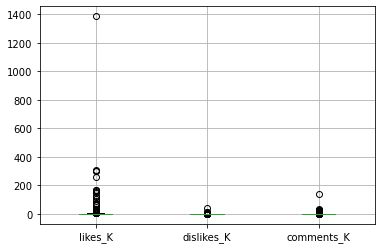

In [36]:
sample.boxplot(column=['likes_K', 'dislikes_K', 'comments_K'])

<AxesSubplot:>

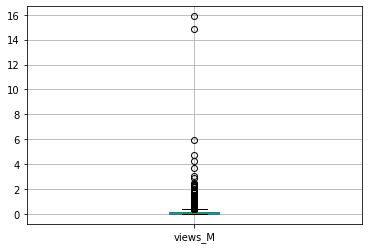

In [37]:
sample.boxplot(column=['views_M'])

array([[<AxesSubplot:title={'center':'views_M'}>,
        <AxesSubplot:title={'center':'likes_K'}>],
       [<AxesSubplot:title={'center':'dislikes_K'}>,
        <AxesSubplot:title={'center':'comments_K'}>]], dtype=object)

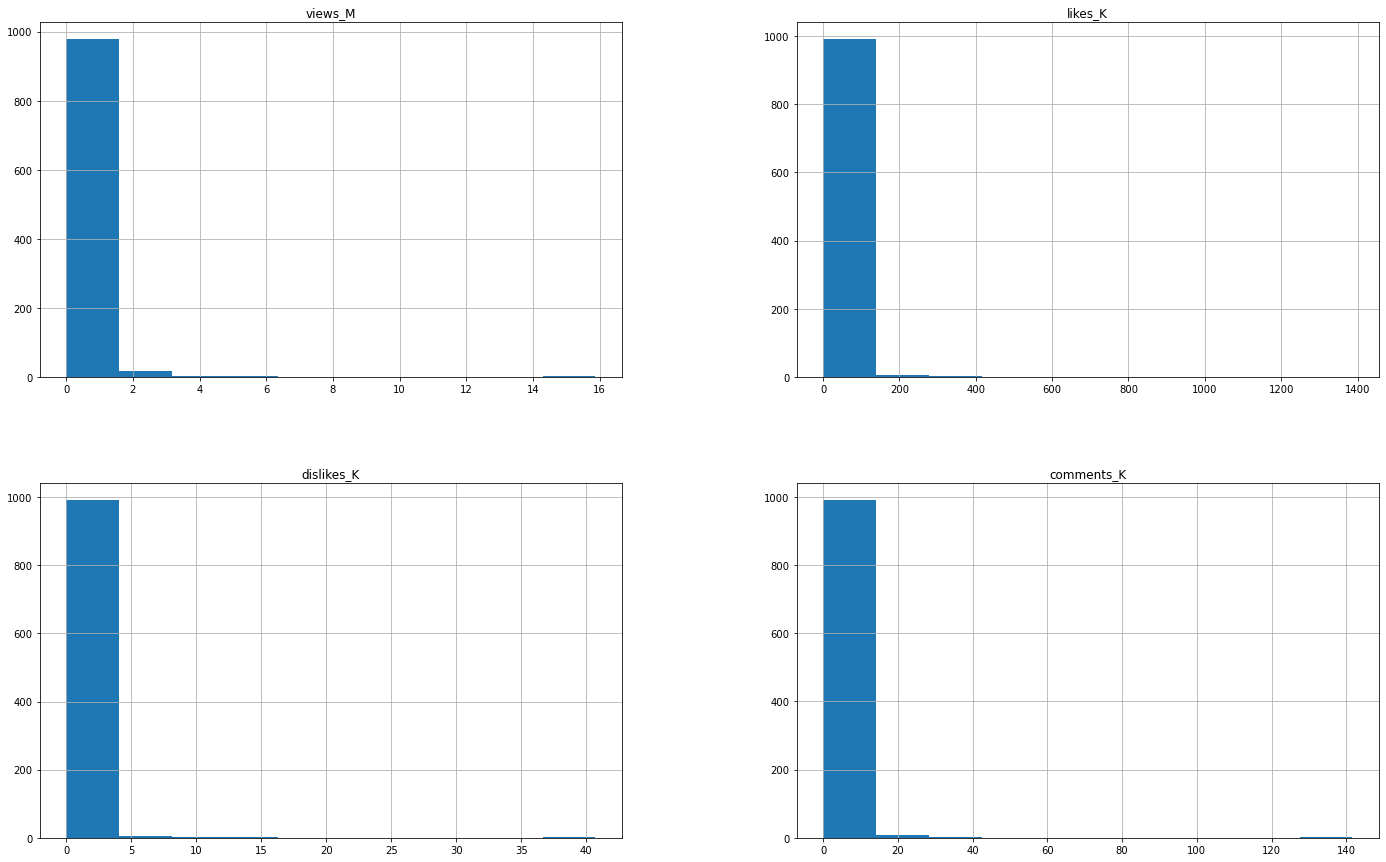

In [38]:
sample.hist(column=['views_M', 'likes_K', 'dislikes_K', 'comments_K'], figsize=(24, 15))

<AxesSubplot:xlabel='category_id', ylabel='views_M'>

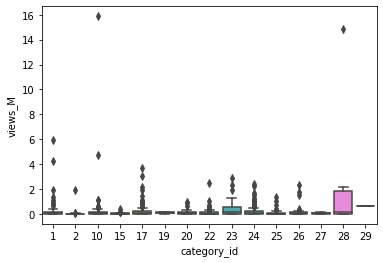

In [39]:
sns.boxplot(x='category_id', y='views_M', data=sample)

##### Get categories from ID to identify the trend Categories

In [40]:
category = pd.read_json('JP_category_id.json')

In [41]:
import json

category_json = json.load(open('JP_category_id.json'))

In [42]:
index = 0
category_dict = {}

while index < len(category_json['items']):
    category_dict[index] = category_json['items'][index]['snippet']['title']
    index += 1

In [43]:
category_dict

{0: 'Film & Animation',
 1: 'Autos & Vehicles',
 2: 'Music',
 3: 'Pets & Animals',
 4: 'Sports',
 5: 'Short Movies',
 6: 'Travel & Events',
 7: 'Gaming',
 8: 'Videoblogging',
 9: 'People & Blogs',
 10: 'Comedy',
 11: 'Entertainment',
 12: 'News & Politics',
 13: 'Howto & Style',
 14: 'Education',
 15: 'Science & Technology',
 16: 'Movies',
 17: 'Anime/Animation',
 18: 'Action/Adventure',
 19: 'Classics',
 20: 'Comedy',
 21: 'Documentary',
 22: 'Drama',
 23: 'Family',
 24: 'Foreign',
 25: 'Horror',
 26: 'Sci-Fi/Fantasy',
 27: 'Thriller',
 28: 'Shorts',
 29: 'Shows',
 30: 'Trailers'}

In [44]:
category_name = [category_dict[index] for index in sample['category_id']]

In [45]:
sample['category_name'] = category_name

<AxesSubplot:xlabel='views_M', ylabel='category_name'>

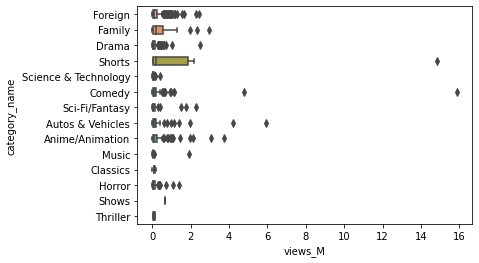

In [46]:
sns.boxplot(y='category_name', x='views_M', width=0.5, data=sample)

##### Groupby - Pivot and Heatmap with categories - comments are disabled or not - amount of likes in thousands

In [47]:
likes_comments = sample[['category_name', 'comments_disabled', 'likes_K']]
likes_comments = likes_comments.groupby(['category_name', 'comments_disabled'], as_index=False).mean()
likes_comments

,category_name,comments_disabled,likes_K
0,Anime/Animation,False,1.478468
1,Anime/Animation,True,4.399750
2,Autos & Vehicles,False,7.405661
3,Autos & Vehicles,True,2.188000
4,Classics,False,1.171000
5,Comedy,False,21.615405
6,Comedy,True,0.677778
7,Drama,False,2.038418
8,Drama,True,0.623429
9,Family,False,21.139293


In [48]:
likes_comments_pivot = likes_comments.pivot(index='category_name', columns='comments_disabled')
likes_comments_pivot

likes_K          
comments_disabled         False      True
category_name                            
Anime/Animation        1.478468  4.399750
Autos & Vehicles       7.405661  2.188000
Classics               1.171000       NaN
Comedy                21.615405  0.677778
Drama                  2.038418  0.623429
Family                21.139293       NaN
Foreign                4.885219  1.144565
Horror                 0.348717  1.022500
Music                  0.399722       NaN
Sci-Fi/Fantasy         5.928000  1.700667
Science & Technology   1.283040  0.167167
Shorts                52.253750  0.000000
Shows                 10.105000       NaN
Thriller               1.268600       NaN

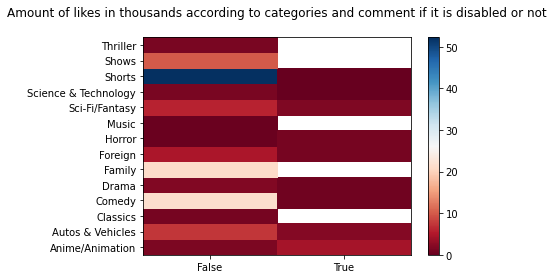

In [49]:
fig, ax = plt.subplots()
im = ax.pcolor(likes_comments_pivot, cmap='RdBu')

#label names
row_labels = likes_comments_pivot.columns.levels[1]
col_labels = likes_comments_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(likes_comments_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(likes_comments_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

fig.colorbar(im)
plt.title('Amount of likes in thousands according to categories and comment if it is disabled or not\n')
plt.show()

##### Frequency Distribution

In [50]:
sample.dtypes

video_id                               object
trending_date                  datetime64[ns]
title                                  object
channel_title                          object
category_id                          category
publish_time              datetime64[ns, UTC]
tags                                 category
views_M                               float64
likes_K                               float64
dislikes_K                            float64
comments_K                            float64
thumbnail_link                         object
comments_disabled                        bool
ratings_disabled                         bool
video_error_or_removed                   bool
description                            object
category_name                          object
dtype: object

In [51]:
freq_dis_category = sample['category_name'].value_counts()
freq_dis_category

Foreign                 274
Drama                   191
Comedy                  125
Anime/Animation         102
Horror                   70
Autos & Vehicles         62
Science & Technology     56
Sci-Fi/Fantasy           42
Family                   41
Music                    18
Shorts                    9
Thriller                  5
Classics                  4
Shows                     1
Name: category_name, dtype: int64

<AxesSubplot:title={'center':'Number of videos with corresponding categories'}>

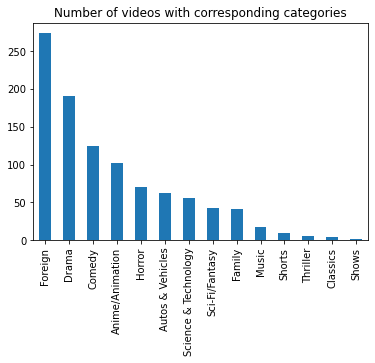

In [52]:
plt.title('Number of videos with corresponding categories')
freq_dis_category.plot.bar()

##### Applying empirical criteria to determine class number and rank for dislikes (in thousand)

In [53]:
dislikes_categories = sample[['category_name', 'dislikes_K']]

In [54]:
dislikes_categories = dislikes_categories.groupby(['category_name'], as_index=False).sum()
dislikes_categories

,category_name,dislikes_K
0,Anime/Animation,14.032
1,Autos & Vehicles,16.159
2,Classics,0.746
3,Comedy,76.473
4,Drama,23.922
5,Family,26.415
6,Foreign,76.858
7,Horror,21.123
8,Music,2.082
9,Sci-Fi/Fantasy,11.722


In [55]:
number_observation = sample.shape[0]

# determine number of classes for dislikes value
for i in range(1, 16):
    number_class = i
    #check condition
    if 2 ** i > number_observation:
        break
        
#calc classes' range
range_class = (sample['dislikes_K'].max() - sample['dislikes_K'].min()) / number_class

#basic information
print('Dislikes_K max = ', sample['dislikes_K'].max())
print('Dislikes_K min = ', sample['dislikes_K'].min())
print('Number of classes = ', number_class)
print('Classes\' range = ', range_class)

Dislikes_K max =  40.715
Dislikes_K min =  0.0
Number of classes =  10
Classes' range =  4.0715


In [56]:
bins_num = number_class
class_range = round(range_class)

new_bin = []
cate_count = []

begin_val = 0
end_val = round(sample['dislikes_K'].min())
new_bin.append(end_val)

for i in range(bins_num):
    end_val += class_range
    new_bin.append(end_val)
    
    cate_count.append(sample[(sample['dislikes_K'] >= begin_val) & (sample['dislikes_K'] <= end_val)].shape[0])
    
    begin_val = end_val
    
print('Categories count: ', cate_count)
print('Class count: ', new_bin)

Categories count:  [991, 6, 0, 2, 0, 0, 0, 0, 0, 0]
Class count:  [0, 4, 8, 12, 16, 20, 24, 28, 32, 36, 40]


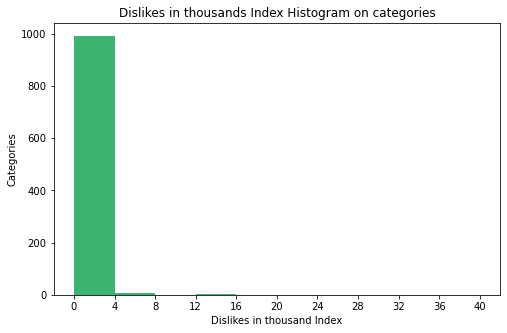

In [57]:
count, bin_edges = np.histogram(sample['dislikes_K'], bins_num)

sample['dislikes_K'].plot(kind='hist',
                      figsize=(8,5),
                      bins=new_bin,
                      xticks=new_bin,
                      color='mediumseagreen')

plt.title('Dislikes in thousands Index Histogram on categories')
plt.ylabel('Categories')
plt.xlabel('Dislikes in thousand Index')

plt.show()

##### Correlation Analysis (with full Dataset) with Scatter Plots

In [58]:
correlation = df.corr()

<AxesSubplot:>

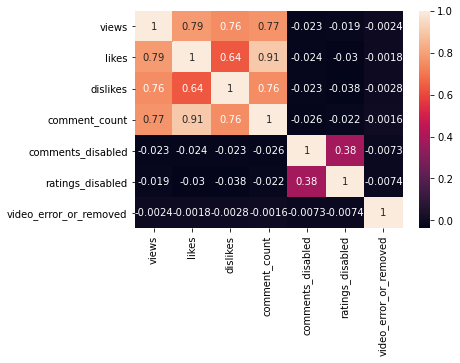

In [59]:
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True)

In [60]:
df[['views', 'likes', 'dislikes', 'comment_count']].corr()

,views,likes,dislikes,comment_count
views,1.000000,0.787476,0.756154,0.772007
likes,0.787476,1.000000,0.635830,0.905587
dislikes,0.756154,0.635830,1.000000,0.755106
comment_count,0.772007,0.905587,0.755106,1.000000


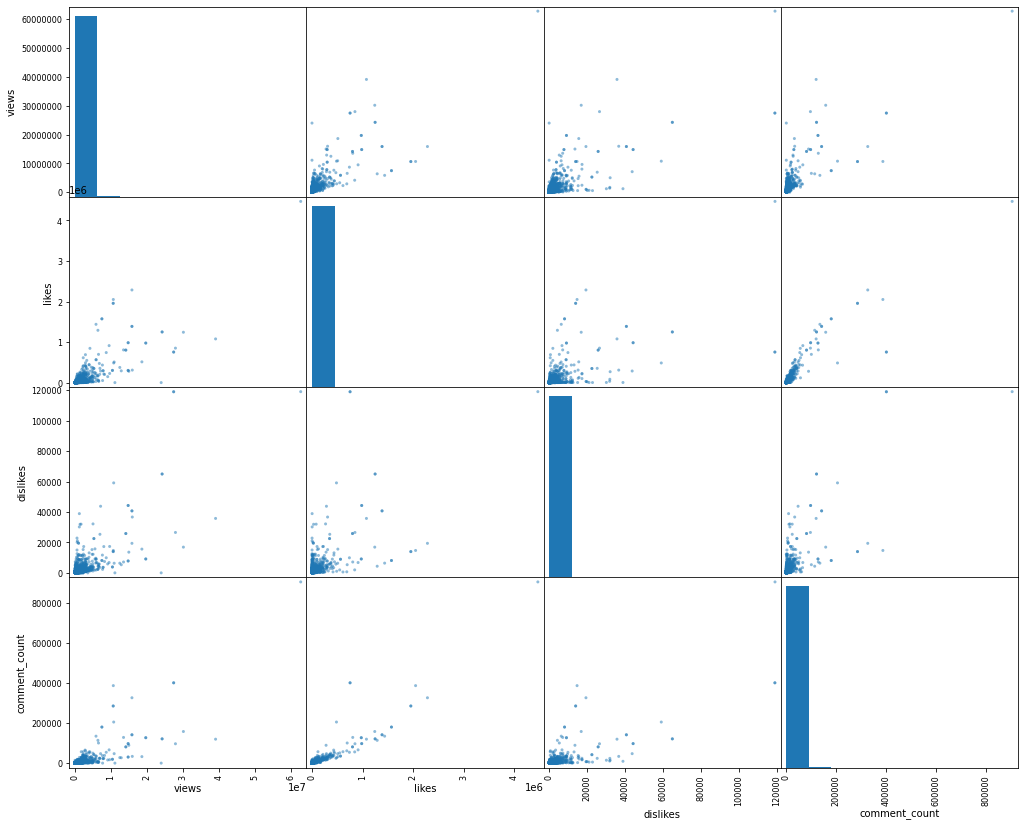

In [61]:
scatter_matrix(df[['views', 'likes', 'dislikes', 'comment_count']], figsize=(17,14))
plt.show()

##### Scatter plot shows the relationship between views (milion) and likes (thousand) according to categories' name of the video

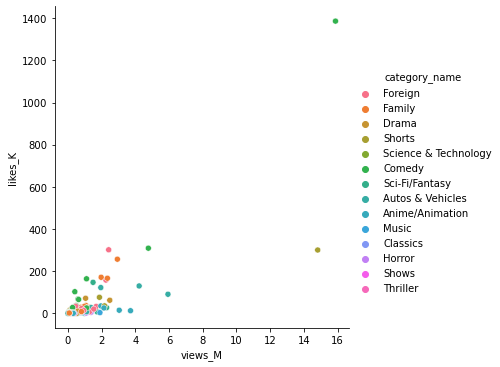

In [62]:
sns.relplot(x='views_M', y='likes_K', hue='category_name', data=sample)

#### Some quick comments:
 - More views -> more likes / dislikes / comments
 - More likes -> more comments
 - Likes and Dislikes usually "grow" together: more likes -> more dislikes and vice versa
 - If comments and ratings are disabled: views / likes / dislikes / comments all decrease -> people want to interact with videos after / before watching them
 - People press "like" button more than "dislike" and "comment"
 - Comedy - Short videos have the most views -> people watch short comedy videos a lot
 - Videos that allow comments have more likes than those don't
 - No comments -> Thriller, Shows, Short, and Family videos receive more likes than others
 - With comments -> Shorts and Comedy videos receive considerably more likes than others
 - There are a lots more videos in Foreign, Drama, and Comedy topics than others

### Part II: Doing on the whole data
#### (USA, Mexico, South Korea, Japan, Great Britain, Germany, and France regions )

#### 4. Adding the column titled “country_origin” and then merging all into one data set.

In [63]:
def category_name_list(filename, df):
    category_json = json.load(open(filename))
    count = 0
    category_dict = {}

    while count < len(category_json['items']):
        index = category_json['items'][count]['id']
        category_dict[index] = category_json['items'][count]['snippet']['title']
        count += 1
        
    category_name = [category_dict[str(index)] if str(index) in category_dict else np.nan for index in df['category_id']]
    
    return category_name

In [64]:
# USA
df_us = pd.read_csv('US_videos.csv', encoding_errors='ignore')
df_us['country_origin'] = ['USA'] * df_us.shape[0]
df_us['category_name'] = category_name_list('US_category_id.json', df_us)
df_us.shape

(40949, 18)

In [65]:
# Mexico
df_mx = pd.read_csv('MX_videos.csv', encoding_errors='ignore')
df_mx['country_origin'] = ['Mexico'] * df_mx.shape[0]
df_mx['category_name'] = category_name_list('MX_category_id.json', df_mx)
df_mx.shape

(40451, 18)

In [66]:
# South Korea
df_kr = pd.read_csv('KR_videos.csv', encoding_errors='ignore')
df_kr['country_origin'] = ['Korean'] * df_kr.shape[0]
df_kr['category_name'] = category_name_list('KR_category_id.json', df_kr)
df_kr.shape

(34567, 18)

In [67]:
# Japan
df_jp = pd.read_csv('JP_videos.csv', encoding_errors='ignore')
df_jp['country_origin'] = ['Japan'] * df_jp.shape[0]
df_jp['category_name'] = category_name_list('KR_category_id.json', df_jp)
df_jp.shape

(20523, 18)

In [68]:
# Great Britain
df_gb = pd.read_csv('GB_videos.csv', encoding_errors='ignore')
df_gb['country_origin'] = ['Great Britain'] * df_gb.shape[0]
df_gb['category_name'] = category_name_list('GB_category_id.json', df_gb)
df_gb.shape

(38916, 18)

In [69]:
# Germany
df_de = pd.read_csv('DE_videos.csv', encoding_errors='ignore')
df_de['country_origin'] = ['Germany'] * df_de.shape[0]
df_de['category_name'] = category_name_list('DE_category_id.json', df_de)
df_de.shape

(40840, 18)

In [70]:
# France
df_fr = pd.read_csv('fr_videos.csv', encoding_errors='ignore')
df_fr['country_origin'] = ['France'] * df_fr.shape[0]
df_fr['category_name'] = category_name_list('FR_category_id.json', df_fr)
df_fr.shape

(40724, 18)

In [71]:
dfs = [df_us, df_mx, df_kr, df_jp, df_gb, df_de, df_fr]
merged_df = pd.concat(dfs, ignore_index=True)
merged_df.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country_origin,category_name
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,USA,People & Blogs
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",USA,Entertainment
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,USA,Comedy
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,USA,Entertainment
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,USA,Entertainment


In [72]:
merged_df.sample(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country_origin,category_name
144551,QfmgAmtGXwo,17.24.12,MY FAVOURITE FILMS THIS YEAR 🎬,KickThePj,1,2017-12-18T16:50:15.000Z,"kickthepj|""pjthekick""|""movie weekender""|""movie...",95818,14373,70,3857,https://i.ytimg.com/vi/QfmgAmtGXwo/default.jpg,False,False,False,to find a favourite film of the year for your ...,Great Britain,Film & Animation
202030,CHXqiiCZSbM,18.29.03,Dirk Müller - Facebook & der perfide Plan hint...,Cashkurs.com,25,2018-03-28T07:27:12.000Z,"Facebook|""Datenschutz""|""Datenmissbrauch""|""KI""|...",84051,4458,61,0,https://i.ytimg.com/vi/CHXqiiCZSbM/default.jpg,True,False,False,"Alle Welt empört sich aktuell darüber, was uns...",Germany,News & Politics
78700,JwkSHpA3VOQ,18.31.05,Ep 1 - John Cena & Kat Dennings in Dallas & Ro...,WWE,23,2018-05-30T16:00:08.000Z,"Dallas & Robo|""Dallas and Robo""|""Dallas""|""Robo...",189720,4169,620,593,https://i.ytimg.com/vi/JwkSHpA3VOQ/default.jpg,False,False,False,When space truckers DALLAS & ROBO have their t...,Mexico,Comedy
34400,DZJod5hUqx4,18.13.05,Michael B. Jordan Kept A Killmonger Diary,The Late Show with Stephen Colbert,24,2018-05-09T07:35:01.000Z,"The Late Show|""Late Show""|""Stephen Colbert""|""S...",524638,8709,218,748,https://i.ytimg.com/vi/DZJod5hUqx4/default.jpg,False,False,False,'Fahrenheit 451' star Michael B. Jordan approa...,USA,Entertainment
80759,RlwMH8XJKuM,18.11.06,Famosas que son reconocidas por su mala higien...,Los Capitanes HD,24,2018-06-10T11:28:47.000Z,"Famosas|""reconocidas""|""mala higiene""",35591,115,101,22,https://i.ytimg.com/vi/RlwMH8XJKuM/default.jpg,False,False,False,NaN,Mexico,Entertainment


In [73]:
merged_df.tail(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country_origin,category_name
256965,coVXf3Q9xBk,18.14.06,عاجل و رسمي : الملف الأمريكي يفوز بشرف تنظيم ك...,KORA LOVERS,1,2018-06-13T12:31:04.000Z,"تنظيم كأس العالم 2026|""كأس العالم 2026""|""المغر...",58758,307,86,485,https://i.ytimg.com/vi/coVXf3Q9xBk/default.jpg,False,False,False,المغرب تخسر تنظيم مونديال كاس العالم 2026 لصال...,France,Film & Animation
256966,_umkjOQJvtw,18.14.06,شاهد ملخص البرلمان اليوم بحضور اخنوش الدي يعطي...,Jadal جدل,25,2018-06-12T17:51:24.000Z,"الباكالوريا في المغرب|""صحاب الباك""|""صحاب الباك...",264639,2011,999,1397,https://i.ytimg.com/vi/_umkjOQJvtw/default.jpg,False,False,False,ملخص ابرز ما حصل في جلسة البرلمان يوم 12/06/20...,France,News & Politics
256967,nt25ec7nzIM,18.14.06,UN ANIME EXPLOSIF A VOIR ABSOLUMENT !,RushManga,22,2018-06-13T11:50:18.000Z,"RushManga|""rush manga""|""anime a voir""|""UN ANIM...",47510,4601,61,615,https://i.ytimg.com/vi/nt25ec7nzIM/default.jpg,False,False,False,•● Yozakura Quartet ~Hana no Uta~ ●•☆ S'abonne...,France,People & Blogs
256968,NlxE_QQMRzg,18.14.06,"Նռան հատիկ, Սերիա 192 / Pomegranate seed / Nra...",PanArmenian TV,1,2018-06-13T18:30:00.000Z,"Նռան հատիկ|""Սերիա 192""|""Pomegranate seed""|""Nra...",78117,244,74,46,https://i.ytimg.com/vi/NlxE_QQMRzg/default.jpg,False,False,False,Follow Armenia TV on social platforms:Instagra...,France,Film & Animation
256969,_LgKglfnqlc,18.14.06,Mandoumbé ak Koor Gui 2018 Episode 28,Yesdakar,24,2018-06-13T19:45:14.000Z,"ramadan2018|""koorgui""|""Mandoumbé""",46604,947,37,127,https://i.ytimg.com/vi/_LgKglfnqlc/default.jpg,False,False,False,NaN,France,Entertainment


In [74]:
merged_df.dropna(axis='rows', inplace=True)

#### 5. Doing correlation analysis


##### categorical variables
country_origin
publish_year
publish_month
trending_date
category_id
comments_disabled
ratings_disabled


##### numerical variables
likes
dislikes
views_count
comment_count

In [75]:
merged_df.shape

(240973, 18)

In [76]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240973 entries, 0 to 256968
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   video_id                240973 non-null  object
 1   trending_date           240973 non-null  object
 2   title                   240973 non-null  object
 3   channel_title           240973 non-null  object
 4   category_id             240973 non-null  int64 
 5   publish_time            240973 non-null  object
 6   tags                    240973 non-null  object
 7   views                   240973 non-null  int64 
 8   likes                   240973 non-null  int64 
 9   dislikes                240973 non-null  int64 
 10  comment_count           240973 non-null  int64 
 11  thumbnail_link          240973 non-null  object
 12  comments_disabled       240973 non-null  bool  
 13  ratings_disabled        240973 non-null  bool  
 14  video_error_or_removed  240973 non-n

In [77]:
merged_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'country_origin',
       'category_name'],
      dtype='object')

In [78]:
# basic cleaning
merged_df['trending_date'] = pd.to_datetime(merged_df['trending_date'], format='%y.%d.%m')
merged_df['publish_time'] = pd.to_datetime(merged_df['publish_time'])

merged_df['category_id'] = merged_df['category_id'].astype('category')
merged_df['tags'] = merged_df['tags'].astype('category')

merged_df.drop_duplicates(inplace=True)

In [79]:
merged_df.isnull().any()

video_id                  False
trending_date             False
title                     False
channel_title             False
category_id               False
publish_time              False
tags                      False
views                     False
likes                     False
dislikes                  False
comment_count             False
thumbnail_link            False
comments_disabled         False
ratings_disabled          False
video_error_or_removed    False
description               False
country_origin            False
category_name             False
dtype: bool

In [80]:
merged_df['publish_year'] = merged_df['publish_time'].dt.year
merged_df['publish_month'] = merged_df['publish_time'].dt.month
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 233498 entries, 0 to 256968
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype              
---  ------                  --------------   -----              
 0   video_id                233498 non-null  object             
 1   trending_date           233498 non-null  datetime64[ns]     
 2   title                   233498 non-null  object             
 3   channel_title           233498 non-null  object             
 4   category_id             233498 non-null  category           
 5   publish_time            233498 non-null  datetime64[ns, UTC]
 6   tags                    233498 non-null  category           
 7   views                   233498 non-null  int64              
 8   likes                   233498 non-null  int64              
 9   dislikes                233498 non-null  int64              
 10  comment_count           233498 non-null  int64              
 11  thumbnail_link          23

##### For numerical variables

In [81]:
def check_p_value(p_value):
    print('P-value = ', p_value, ' -> ', end='')
    if p_value < 0.001:
        print('High certainty in the result')
    elif p_value < 0.05:
        print('Moderate certainty in the result')
    elif p_value < 0.1:
        print('Low certainty in the result')
    else:
        print('Lack of certainty in the result')

In [82]:
def check_pearson_coef(pearson_coef):
    print('Pearson\'s Correlation coefficient = ', pearson_coef, ' -> ', end='')
    if round(pearson_coef) == 0:
        print('No correlation')
    elif round(pearson_coef) == -1:
        print('High negative correlation')
    elif round(pearson_coef) == 1:
        print('High positive correlation')

In [83]:
print('Likes and Dislikes')
pearson_coef, p_value = stats.pearsonr(merged_df['likes'], merged_df['dislikes'])
check_pearson_coef(pearson_coef)
check_p_value(p_value)

Likes and Dislikes
Pearson's Correlation coefficient =  0.49994018141014646  -> No correlation
P-value =  0.0  -> High certainty in the result


In [84]:
print('Likes and Views')
pearson_coef, p_value = stats.pearsonr(merged_df['likes'], merged_df['views'])
check_pearson_coef(pearson_coef)
check_p_value(p_value)

Likes and Views
Pearson's Correlation coefficient =  0.7837634212026893  -> High positive correlation
P-value =  0.0  -> High certainty in the result


In [85]:
print('Likes and Comments')
pearson_coef, p_value = stats.pearsonr(merged_df['likes'], merged_df['comment_count'])
check_pearson_coef(pearson_coef)
check_p_value(p_value)

Likes and Comments
Pearson's Correlation coefficient =  0.8435923122486381  -> High positive correlation
P-value =  0.0  -> High certainty in the result


In [86]:
print('Dislikes and Views')
pearson_coef, p_value = stats.pearsonr(merged_df['dislikes'], merged_df['views'])
check_pearson_coef(pearson_coef)
check_p_value(p_value)

Dislikes and Views
Pearson's Correlation coefficient =  0.4818430417455055  -> No correlation
P-value =  0.0  -> High certainty in the result


In [87]:
print('Dislikes and Comments')
pearson_coef, p_value = stats.pearsonr(merged_df['dislikes'], merged_df['comment_count'])
check_pearson_coef(pearson_coef)
check_p_value(p_value)

Dislikes and Comments
Pearson's Correlation coefficient =  0.6361240700671953  -> High positive correlation
P-value =  0.0  -> High certainty in the result


In [88]:
print('Views and Comments')
pearson_coef, p_value = stats.pearsonr(merged_df['views'], merged_df['comment_count'])
check_pearson_coef(pearson_coef)
check_p_value(p_value)

Views and Comments
Pearson's Correlation coefficient =  0.5449442118813932  -> High positive correlation
P-value =  0.0  -> High certainty in the result


<AxesSubplot:>

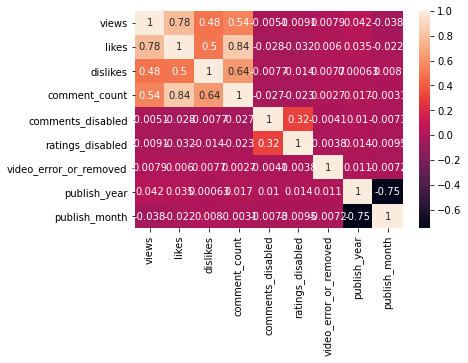

In [89]:
correlation = merged_df.corr()
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True)

In [90]:
merged_df[['views', 'likes', 'dislikes', 'comment_count']].corr()

,views,likes,dislikes,comment_count
views,1.000000,0.783763,0.481843,0.544944
likes,0.783763,1.000000,0.499940,0.843592
dislikes,0.481843,0.499940,1.000000,0.636124
comment_count,0.544944,0.843592,0.636124,1.000000


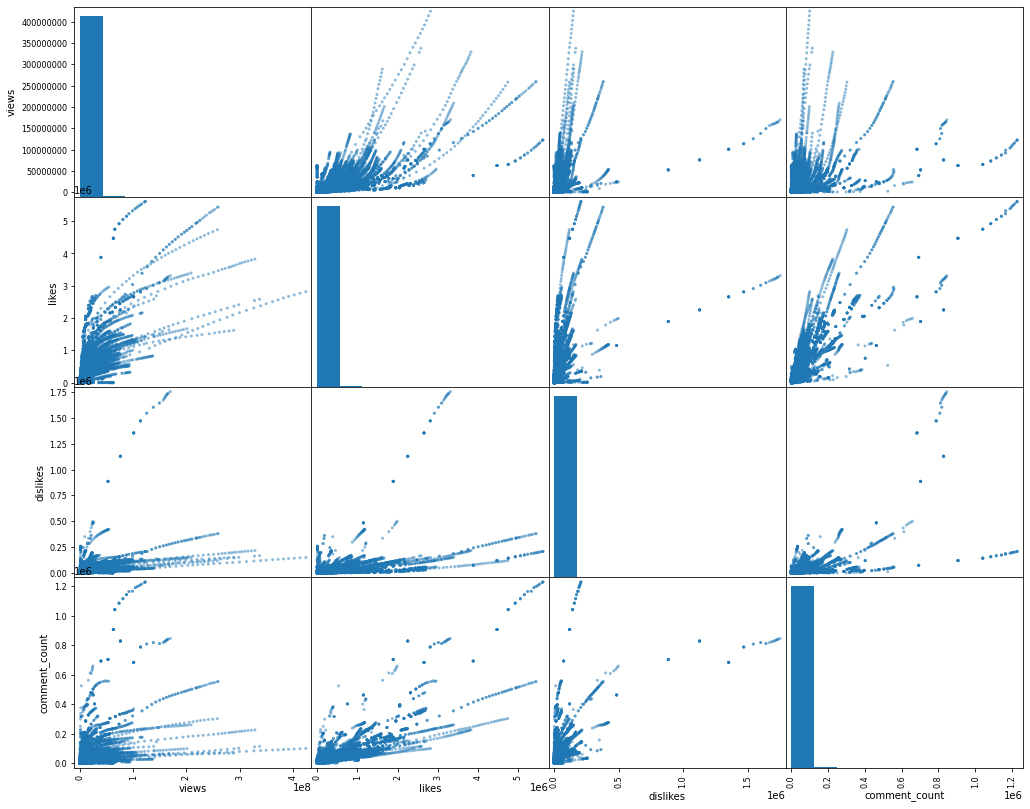

In [91]:
scatter_matrix(merged_df[['views', 'likes', 'dislikes', 'comment_count']], figsize=(17,14))
plt.show()

##### For categorical variables

##### Question: Is there any relationship between comments_disabled and country_origin?

In [92]:
merged_df['country_origin'].value_counts()

USA              40332
Germany          39042
Great Britain    38099
France           37702
Mexico           36043
Korean           28997
Japan            13283
Name: country_origin, dtype: int64

In [93]:
merged_df['comments_disabled'].value_counts()

False    228798
True       4700
Name: comments_disabled, dtype: int64

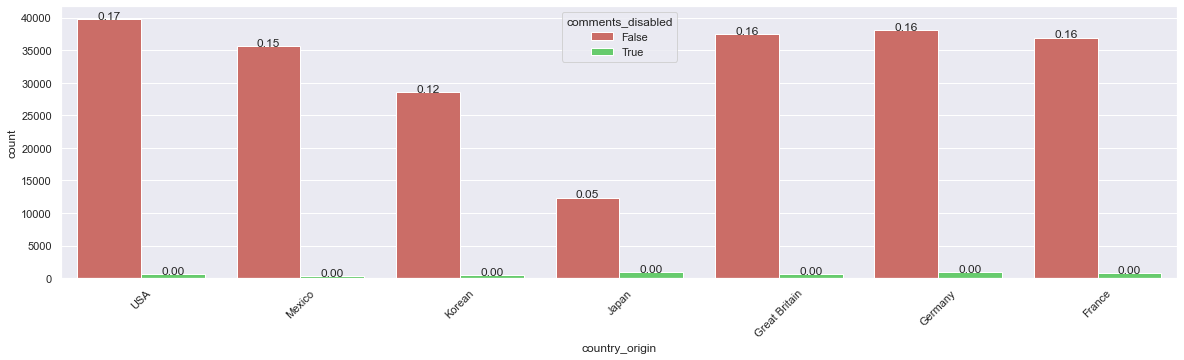

In [94]:
sns.set(style='darkgrid')
sns.set_palette('hls', 3)
fig, ax = plt.subplots(figsize=(20, 5))
ax = sns.countplot(x='country_origin', hue='comments_disabled', data=merged_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
           height + 3,
           '{:1.2f}'.format(height/merged_df.shape[0]),
           ha='center')

In [95]:
country_comments_disabled_ct = pd.crosstab(index=merged_df['country_origin'],
                                                      columns=merged_df['comments_disabled'])

country_comments_disabled_ct

comments_disabled,False,True
country_origin,,
France,36935,767
Germany,38086,956
Great Britain,37441,658
Japan,12358,925
Korean,28574,423
Mexico,35675,368
USA,39729,603


In [96]:
arr_input = country_comments_disabled_ct.iloc[:].to_numpy()
(chi2, p, dof, _) = stats.chi2_contingency([arr_input])

print('chi2: ', chi2)
print('p-value: ', p)
print('Degree of freedom: ', dof)

alpha = 0.05
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

print('\nDouble Check:')
prob = 0.95
critical = stats.chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, chi2_value=%.3f' % (prob, critical, chi2))
if abs(chi2) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

chi2:  1983.9568756896258
p-value:  0.0
Degree of freedom:  6
significance=0.050, p=0.000
Dependent (reject H0)

Double Check:
probability=0.950, critical=12.592, chi2_value=1983.957
Dependent (reject H0)


##### Conclusion: There is a relationship between the country (country_origin) and whether the comments are disabled or not (comments_disabled).

##### Question: Is there any relationship between category_name and publish_month?

In [97]:
merged_df['category_name'].value_counts()

Entertainment            67556
Music                    31990
People & Blogs           30050
News & Politics          19590
Sports                   16473
Comedy                   15807
Howto & Style            13600
Film & Animation         12785
Gaming                    8275
Science & Technology      5120
Education                 4659
Pets & Animals            3492
Autos & Vehicles          2566
Travel & Events           1021
Shows                      443
Nonprofits & Activism       53
Movies                      13
Trailers                     5
Name: category_name, dtype: int64

In [98]:
merged_df['publish_month'].value_counts()

3     36475
5     35172
12    34153
2     33555
1     31571
4     29178
11    21663
6     11334
10      174
9        88
8        78
7        57
Name: publish_month, dtype: int64

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

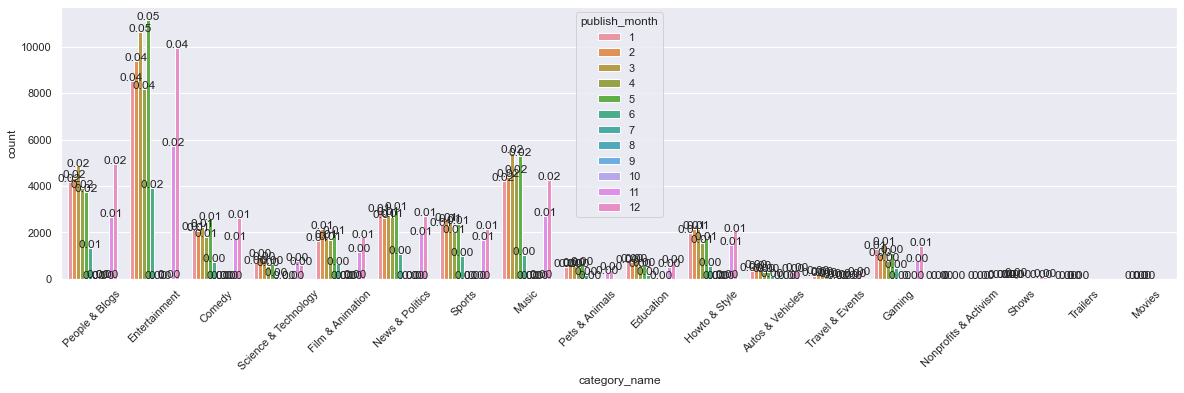

In [99]:
sns.set(style='darkgrid')
sns.set_palette('hls', 3)
fig, ax = plt.subplots(figsize=(20, 5))
ax = sns.countplot(x='category_name', hue='publish_month', data=merged_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
           height + 3,
           '{:1.2f}'.format(height/merged_df.shape[0]),
           ha='center')

In [100]:
category_month_ct = pd.crosstab(index=merged_df['category_name'],
                                                      columns=merged_df['publish_month'])

category_month_ct

publish_month,1,2,3,4,5,6,7,8,9,10,11,12
category_name,,,,,,,,,,,,
Autos & Vehicles,335,460,430,301,281,102,0,0,17,8,298,334
Comedy,2119,2066,2223,1804,2555,713,4,1,11,5,1698,2608
Education,706,719,743,529,572,179,0,0,10,0,501,700
Entertainment,8522,9406,10630,8195,11161,3909,13,17,0,21,5730,9952
Film & Animation,1647,2151,1786,1664,1931,614,2,18,10,39,1143,1780
Gaming,1282,1007,1473,754,1104,483,1,0,0,9,746,1416
Howto & Style,1983,2133,2163,1549,1700,540,3,1,1,21,1469,2037
Movies,0,0,0,5,7,1,0,0,0,0,0,0
Music,4222,4392,5433,4583,5305,1044,13,6,18,20,2694,4260


In [101]:
arr_input = category_month_ct.iloc[:].to_numpy()
(chi2, p, dof, _) = stats.chi2_contingency([arr_input])

print('chi2: ', chi2)
print('p-value: ', p)
print('Degree of freedom: ', dof)

alpha = 0.05
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

print('\nDouble Check:')
prob = 0.95
critical = stats.chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, chi2_value=%.3f' % (prob, critical, chi2))
if abs(chi2) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

chi2:  3566.509029181082
p-value:  0.0
Degree of freedom:  187
significance=0.050, p=0.000
Dependent (reject H0)

Double Check:
probability=0.950, critical=219.906, chi2_value=3566.509
Dependent (reject H0)


##### Conclusion: There is a relationship between the categories (category_name) and months in a year (publish_month).

#### 6. Disscuss the result

 - More views -> more likes / dislikes / comments
 - More likes -> more comments
 - Likes and Dislikes usually "grow" together: more likes -> more dislikes and vice versa
 - If comments and ratings are disabled: views / likes / dislikes / comments all decrease -> people want to interact with videos after / before watching them
 - People press "like" button more than "dislike" and "comment"
 
 ###### In Japan:
 - Comedy - Short videos have the most views -> people watch short comedy videos a lot
 - Videos that allow comments have more likes than those don't
 - No comments -> Thriller, Shows, Short, and Family videos receive more likes than others
 - With comments -> Shorts and Comedy videos receive considerably more likes than others
 - There are a lots more videos in Foreign, Drama, and Comedy topics than others
 
 ###### In general:
 - July, August, September, October: less videos than other months (all categories)
 - There are less videos in Movies, Nonprofits & Activism and Trailers than other categories
 - Most videos are in the Entertainments category
 - Publish time (date, month, year) is not related to how people interact with videos